# Model the number of rides per day by hubway station in Boston

In [31]:
import pandas as pd
from sklearn import linear_model
from sklearn import cross_validation
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import numpy as np
from pylab import savefig

In [188]:
ridedata = pd.read_csv('../Data/Boston/FeaturesGroup4.csv')

In [197]:
ind1 = np.arange(10)
ind2 = np.arange(10) + 1
ind3 = np.arange(10) + 2
dic = {'ind1': ind1, 'ind2': ind2, 'ind3': ind3}

In [198]:
dffer = pd.DataFrame(dic)

In [199]:
dffer

,ind1,ind2,ind3
0,0,1,2
1,1,2,3
2,2,3,4
3,3,4,5
4,4,5,6
5,5,6,7
6,6,7,8
7,7,8,9
8,8,9,10
9,9,10,11


In [189]:
ridedata.columns

Index([u'Unnamed: 0', u'stationid', u'duration', u'nrides', u'ndays', u'lat',
       u'lng', u'originpop', u'originwork', u'originsubway', u'destpop',
       u'destwork', u'destsubway', u'ridesperday'],
      dtype='object')

In [190]:
inliers = ridedata[ridedata['ridesperday'] < 45]

In [191]:
y = inliers['ridesperday'].values
X = inliers[['originpop', 'originwork','destpop','destwork','originsubway','destsubway']].values
inliersfeat = inliers[['originpop', 'originwork','destpop','destwork','originsubway','destsubway','ridesperday']]
#inliersfeat = inliers[['originsubway','destsubway','ridesperday']]

In [192]:
clf = linear_model.LinearRegression()
#clf.fit(X_train, y_train)
#clf.coef_
#clf.score(X_test, y_test)
scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='r2')

In [193]:
scores, scores.mean(), scores.std()

(array([ 0.63533262,  0.37974174,  0.45923517,  0.03004847,  0.35932402]),
 0.37273640306492262,
 0.19702933621906565)

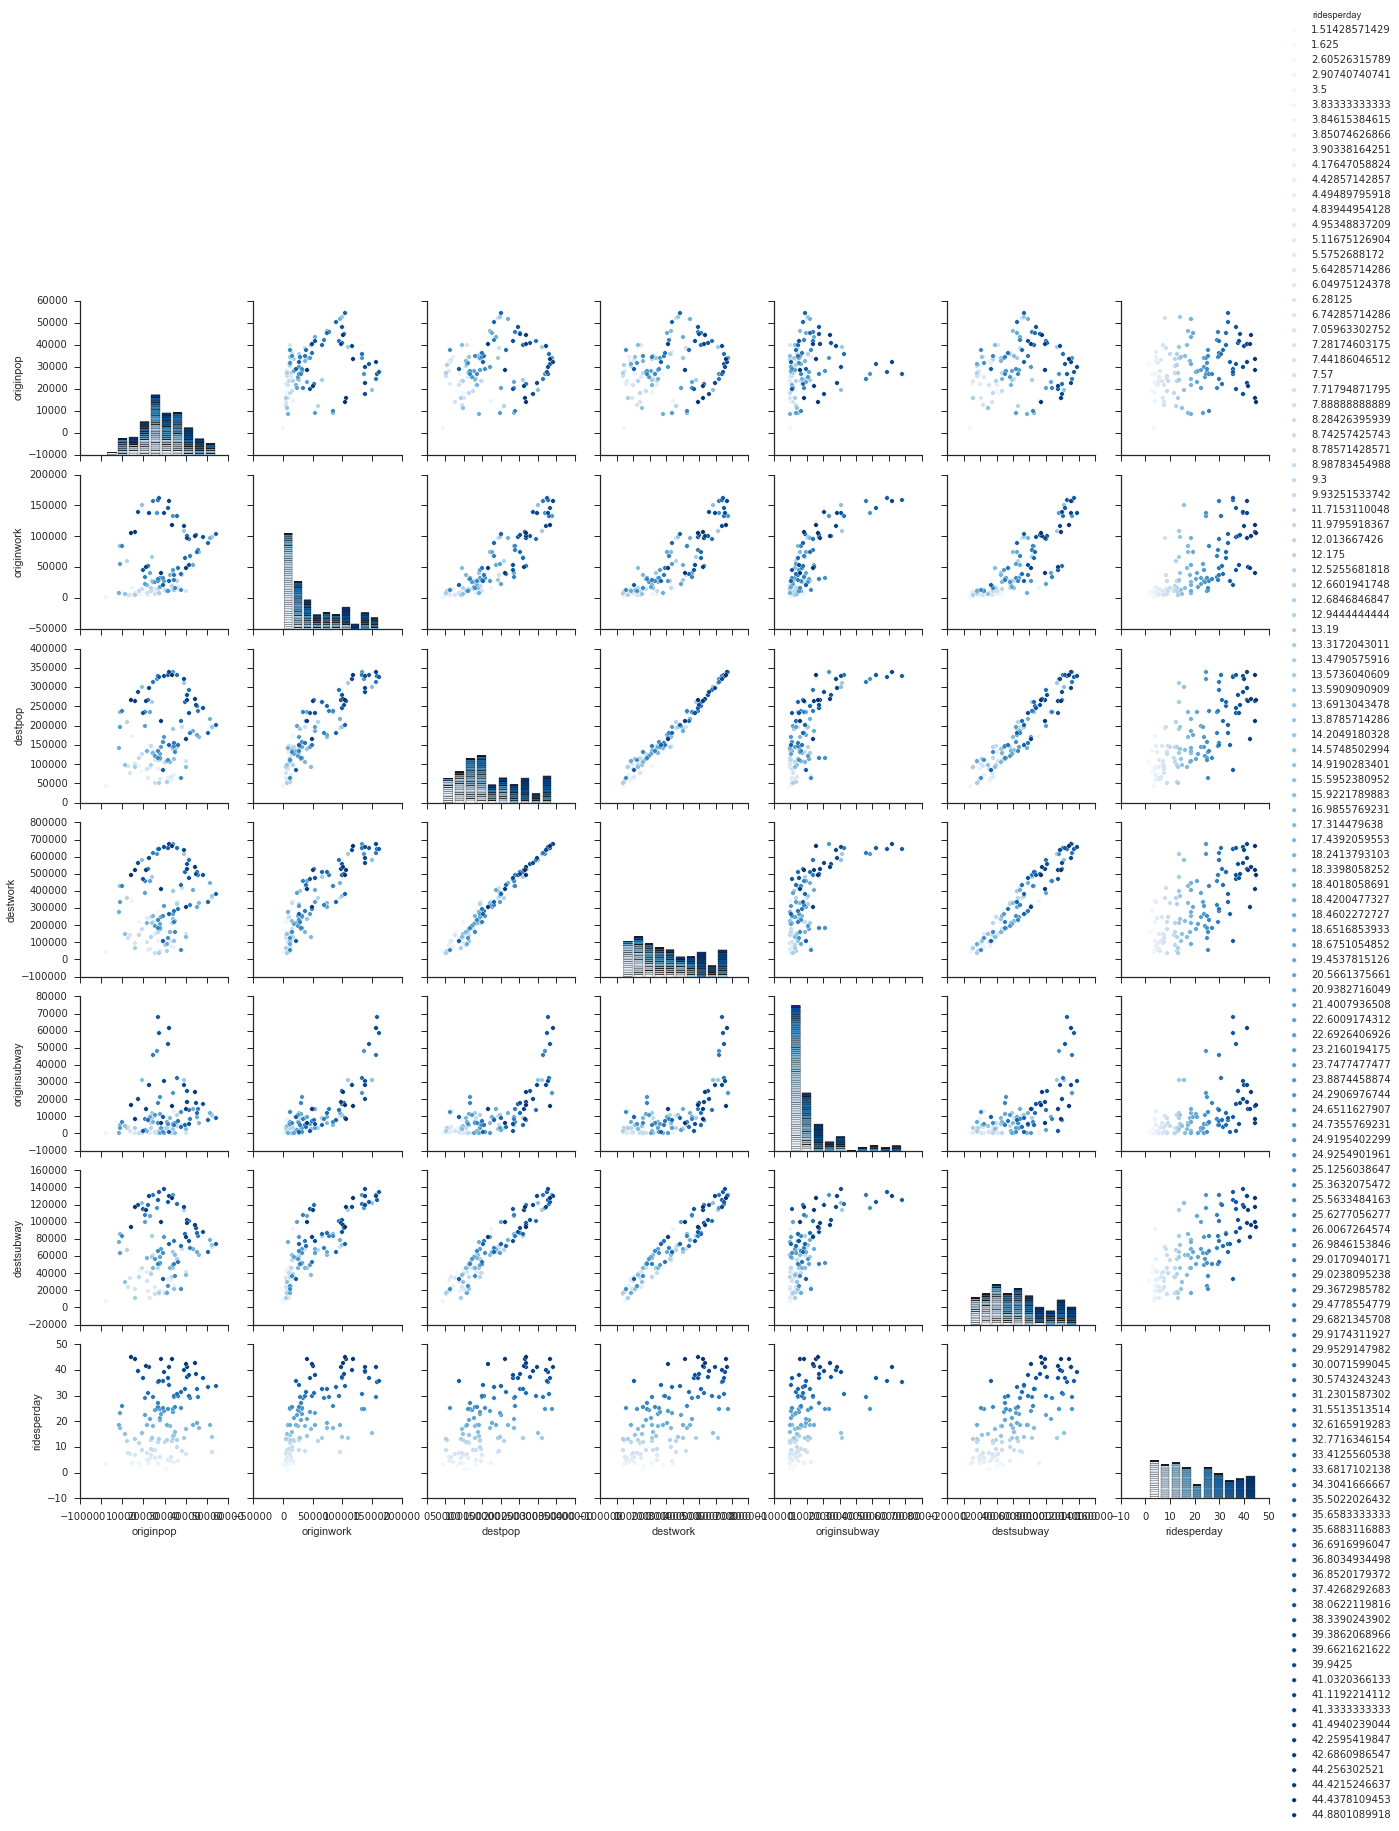

In [194]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
#cmap = plt.get_cmap("Blues")
#iris = sns.load_dataset("iris")
inliersfeat = inliersfeat.sort('ridesperday')
g = sns.pairplot(inliersfeat, hue="ridesperday", palette="Blues")

In [196]:
g.fig?

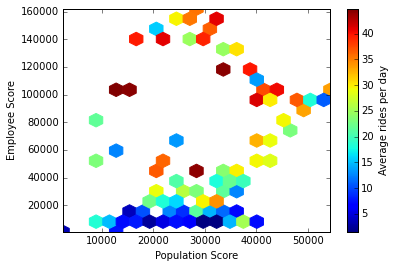

In [171]:
plt.hexbin(X[:,0], X[:, 1], C=y, gridsize=20)
cbar = plt.colorbar()
plt.xlabel('Population Score')
plt.ylabel('Employee Score')
cbar.set_label('Average rides per day')
savefig('../Figures/workpoprides_Group4.png')

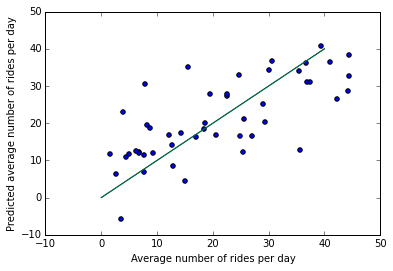

In [169]:
for isim in range(2):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(
         X, y, test_size=0.2)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    plt.scatter(y_test, y_pred)
    plt.plot([0,40], [0,40])
    plt.xlabel('Average number of rides per day')
    plt.ylabel('Predicted average number of rides per day')
savefig('../Figures/ridesperdayregression_Group4.png')

In [97]:
ridedata.plot(x='start_day', y='nrides', figsize=(12,6))

KeyError: 'start_day'